In [1]:
%config Completer.use_jedi = False

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv('FinalSongData10.csv').set_index(['trackName', 'artistName', 'id'])

In [21]:
df.head()

,,,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,playCount
trackName,artistName,id,,,,,,,,,,
100k,The Loved Ones,1LofCVLTwOF6SikmM7STkb,0.463,0.954,-4.513,0.0449,0.003220,0.000014,0.3890,0.793,99.938,10
155,+44,3DPBEiVe1lzl8MP0NDVM7R,0.462,0.936,-3.604,0.0429,0.001730,0.000037,0.3730,0.546,155.017,25
17 Girls In A Row,Steel Panther,07vFoIywXHy1umQJeYUmiS,0.559,0.926,-3.310,0.0559,0.000015,0.000007,0.0779,0.637,99.985,13
241,Reel Big Fish,4mxff4HQLQ1fMEUvwblzst,0.729,0.614,-7.236,0.0544,0.013400,0.414000,0.0616,0.964,138.786,10
3-D,Stranger,7r5wep1TKafUObN3pEBFaW,0.560,0.772,-6.096,0.0836,0.037500,0.000000,0.1560,0.788,170.080,13


# EDA

I mainly want to use this notebook to look at the individual audio analysis features to see if there are any features that may hurt the cluster model.

Danceability: From 0 to 1. How "easy" it is to dance to a song.

Energy: 0 to 1. Represents a perceptual measure of intensity and activity. Higher ---> more energy

Loudness: Overall loudness of a track in dB. Typically between -60 and 0 dB.

Speechiness: 0 to 1. Detects the amount of speech compared to the amount of singing. Higher ---> more speech.

Acousticness: 0 to 1. Measures how acoustic vs. electric. Higher is more acoustic.

Instrumentalness: 0 to 1. The higher, the more likely it is instrumental (no vocals)

Liveness: 0 to 1. Higher means the track is more likely to be recorded live.

Valence: 0 to 1. Positiveness conveyed by a song. The higher the score, the more positive (happy, etc) it is.

Tempo: The quickness of a song. The higher, the more fast-paced.

Play Count: Amount of times played in my streaming data (no need to analyze this. I want to use it as a weight when performing the clustering).

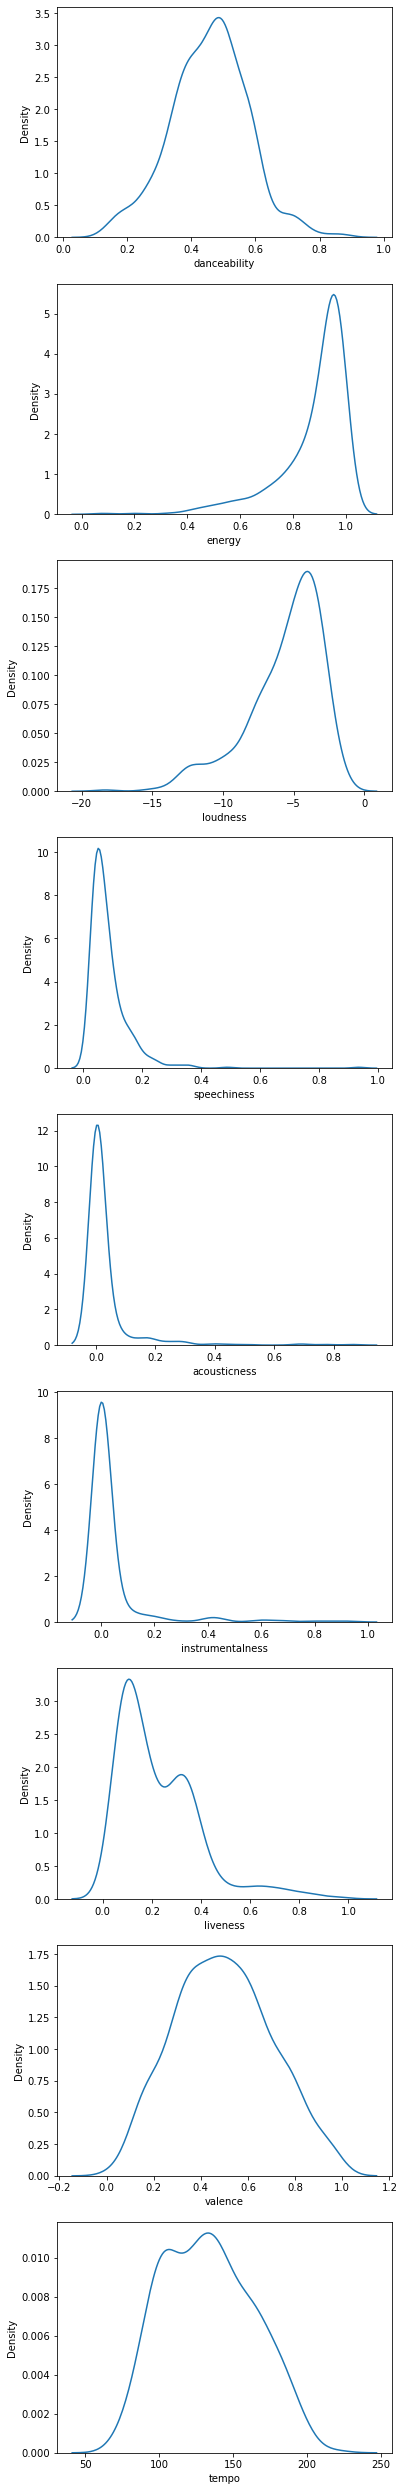

In [22]:
data = df.drop('playCount', axis=1)

N = data.shape[1]

fig, ax = plt.subplots(nrows=N, ncols=1, figsize=(6, N*5))

for i in range(N):
    sns.kdeplot(data=data, x=data.columns[i], ax=ax[i])

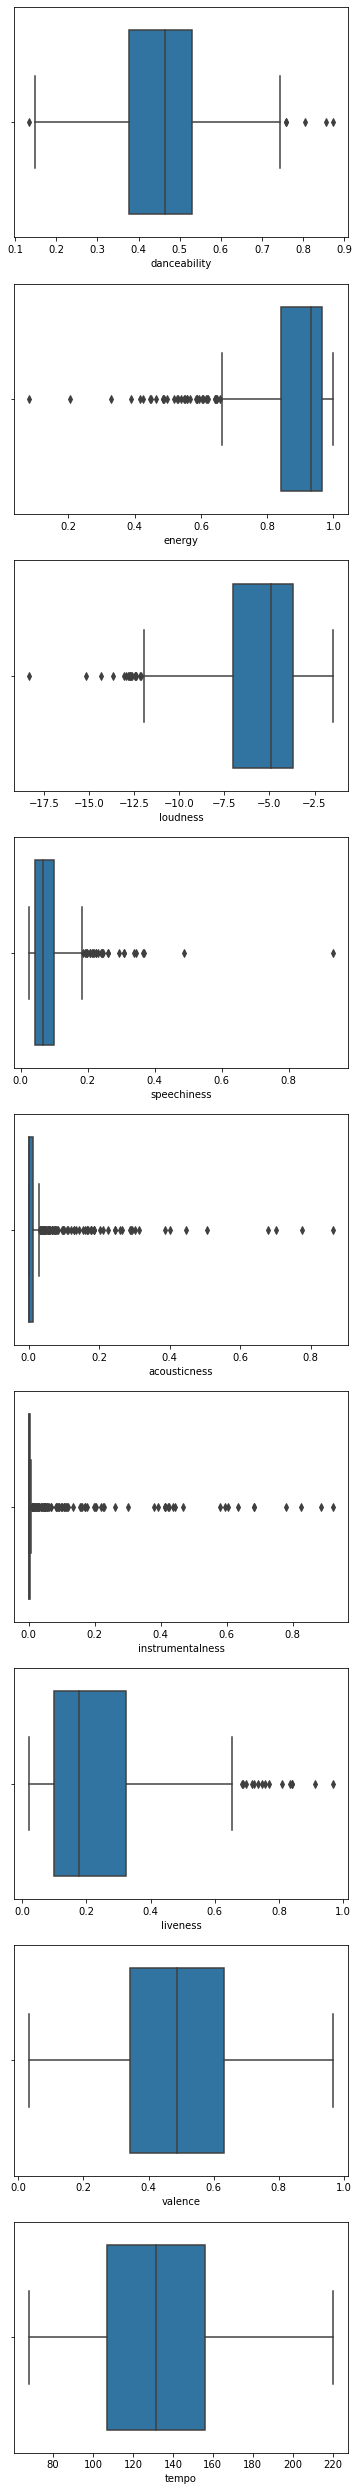

In [23]:
fig, ax = plt.subplots(nrows=N, ncols=1, figsize=(6, N*5))

for i in range(N):
    sns.boxplot(data=data, x=data.columns[i], ax=ax[i])

As the above shows, my top songs are, for the most part, have tightly distributed features. 

The speechiness, acousticness, and instrumentalness are all centered around 0 very closely. I will look into each of these further.

In [24]:
df['instrumentalness'].describe()

count    479.000000
mean       0.036974
std        0.123517
min        0.000000
25%        0.000000
50%        0.000057
75%        0.003175
max        0.923000
Name: instrumentalness, dtype: float64

As we can see, almost the 50 percentile has instrumentalness of 0.000057. With a range of 0-1, this is very low.

In [25]:
df['instrumentalness'].sort_values(ascending=False)[:20]

trackName                       artistName                    id                    
X2                              Queensrÿche                   7yGEsUF0xXmWR5Iv3Z5sFH    0.923
The Man On The Silver Mountain  Stonecreep                    1837D6O0m4SfWBnHszc60a    0.887
Ride The Chariot To The Devil   Sum 41                        1VOLK46t0ieQfKHbkkIavX    0.826
Up Around The Bend              Creedence Clearwater Revival  36gPq8WG7tDxrblyGVUCiT    0.779
The Misanthropic Principle      Strung Out                    3elHyNdHDSqRNE4Vl8tS70    0.683
If I Die Tomorrow               Mötley Crüe                   228ykahUJx0Cb31NW7hUdN    0.682
Photograph                      Def Leppard                   18URo35acNKRTHfEdjTcGn    0.635
Alive and Well                  Rise Against                  0I1hrHId3ITpHnbxfro06U    0.604
Iron Will                       Skid Row                      7BJndDb5qtVS0dCsziYdXh    0.594
La Villa Strangiato             Rush                          4CyElmi

According to spotify, instrumentalness > 0.5 indicates a belief the song is an instrumental, with the closer it is to 1, the more likely. However, the only songs on this list above that are instrumentals are "La Villa Strangiato" and "Ride the Chariot to the Devil".

Additionally, some of the songs above have lyrics consistently throughout the entire song. Just looking at this sample of songs, I do not think the feature appears to be reliable, so I will not use it.

In [26]:
df['speechiness'].sort_values(ascending=False)

trackName                            artistName                      id                    
Inward Singing                       Tenacious D                     2m8II1x7132qcFWvoJo24S    0.9330
Pussywhipped                         Steel Panther                   5Q24iee6y158mXHdYIAp5X    0.4880
Six Feet Under                       Like A Storm                    05ZUA0cuHF1pLFBQEWHTUT    0.3670
Here Comes Treble                    The Flatliners                  3oGCW2gqlKmGhxcsZPBtyd    0.3650
Boombox                              The Lonely Island               0EvSy0XrbY1RHswHv5maqy    0.3450
                                                                                                ...  
The Nameless One                     Volbeat                         0XhrFdPqMsH40f7Z0gAHpi    0.0264
Little Lies - Unreleased Demo Track  Andi Deris And The Bad Bankers  40ux182EuzPuOY4HMn94bQ    0.0264
No, It Isn't                         +44                             4isP4utvgJyHHp1iYOAMQQ 

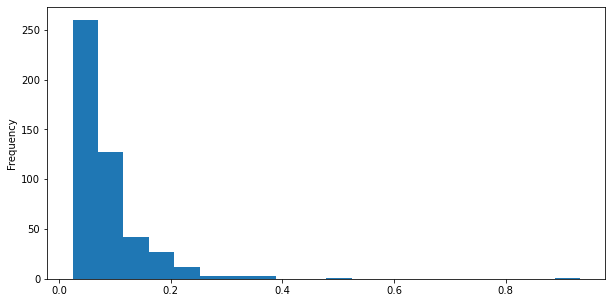

In [27]:
df['speechiness'].plot(kind='hist', bins=20, figsize=(10, 5));

In [28]:
(df['speechiness']>0.25).value_counts()

False    468
True      11
Name: speechiness, dtype: int64

As I can see, is only 11 songs with speechiness above 0.25. I will remove these.

In [29]:
df['acousticness'].sort_values(ascending=False)

trackName                                                     artistName           id                    
Hit & Run                                                     Stranger             0p7QF136UOOUHnyU8CuZra    0.864000
Girls                                                         Beastie Boys         5h40ovzXu7rF7Giwb9oXYy    0.777000
Inward Singing                                                Tenacious D          2m8II1x7132qcFWvoJo24S    0.701000
We Will Rock You                                              Queen                54flyrjcdnQdco7300avMJ    0.679000
Ebay (Parody of "I Want It That Way" by the Backstreet Boys)  "Weird Al" Yankovic  4vHb50VkxDzHYwLiHfWczK    0.505000
                                                                                                               ...   
Mama Didn't Raise No Fool                                     Firehouse            6coW4B18bFNuHT4qu3UwWH    0.000008
The Man On The Silver Mountain                                Stonec

In [30]:
df['acousticness'].describe()

count    479.000000
mean       0.030435
std        0.092256
min        0.000004
25%        0.000231
50%        0.001540
75%        0.012500
max        0.864000
Name: acousticness, dtype: float64

<AxesSubplot:ylabel='Frequency'>

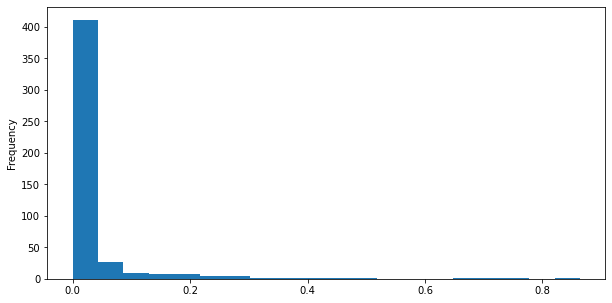

In [31]:
df['acousticness'].plot(kind='hist', bins=20, figsize=(10, 5))

In [32]:
(df['acousticness']>0.25).value_counts()

False    464
True      15
Name: acousticness, dtype: int64

As we can see, there is also only 14 songs with acousticness above 0.25. With these extreme outliers beyond this, I will remove these as well.

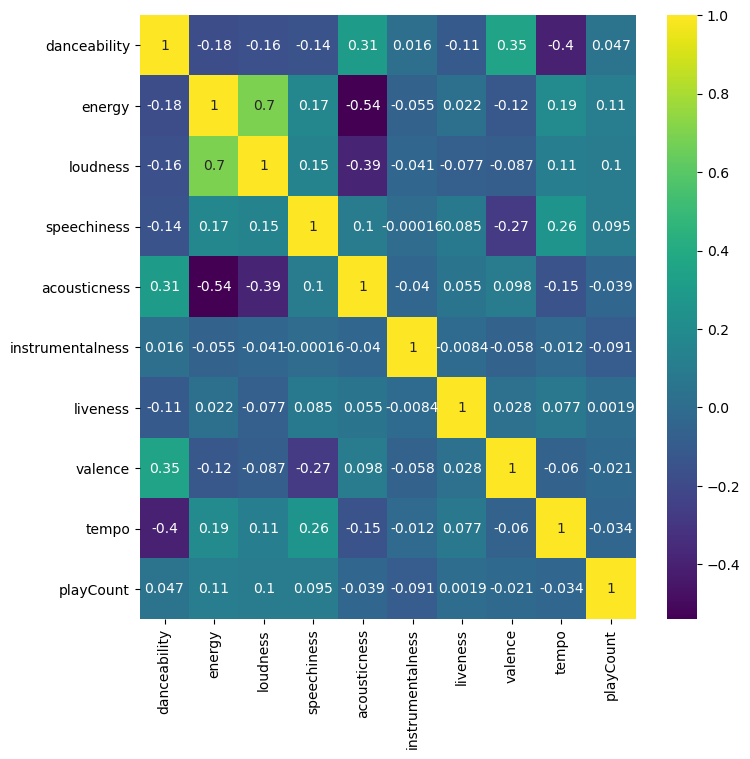

In [33]:
plt.figure(figsize=(8,8), dpi=100)

sns.heatmap(data=df.corr(), cmap='viridis', annot=True);

### Conclusions

Based on the above, I have decided to do the following:

    1) Remove the instrumentalness feature
    2) Remove all songs for training with acousticness and speechiness > 0.25

In [36]:
df_for_model = df[(df['speechiness']<0.25) & (df['acousticness']<0.25)].drop('instrumentalness', axis=1)

In [37]:
df_for_model.head()

,,,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo,playCount
trackName,artistName,id,,,,,,,,,
100k,The Loved Ones,1LofCVLTwOF6SikmM7STkb,0.463,0.954,-4.513,0.0449,0.003220,0.3890,0.793,99.938,10
155,+44,3DPBEiVe1lzl8MP0NDVM7R,0.462,0.936,-3.604,0.0429,0.001730,0.3730,0.546,155.017,25
17 Girls In A Row,Steel Panther,07vFoIywXHy1umQJeYUmiS,0.559,0.926,-3.310,0.0559,0.000015,0.0779,0.637,99.985,13
241,Reel Big Fish,4mxff4HQLQ1fMEUvwblzst,0.729,0.614,-7.236,0.0544,0.013400,0.0616,0.964,138.786,10
3-D,Stranger,7r5wep1TKafUObN3pEBFaW,0.560,0.772,-6.096,0.0836,0.037500,0.1560,0.788,170.080,13


In [38]:
df_for_model.shape

(454, 9)

In [40]:
df_for_model.to_csv('SongDataForModel.csv')